## Final Project Submission


* #### __Student name:__ Pascalia Maiga
* #### __Student pace: Full time__
* #### __Scheduled project review date/time: N/A
* #### __Instructor name: Maryann Mwikali
* #### __Blog post URL:N/A


# 1. Introduction

## 1.1 Overview

This project is purposely for coming up with insights to assist Microsoft on how to start and be proficient in the movie business. For us to come up with this insights we will be required to use exploratory data which will assist us on choosing what type of films should be created by Microsoft.

## 1.2 Objectives

### 1.2.1 General objectives


To choose which kind of films should be produced by Microsoft through deeper research and assessment on the kind of films that are currently excelling at the box office.

### 1.2.2 Other objectives

i. Loading datasets into pandas <br>
ii. Retrieving data from a DataFrame <br>
iii. Data preparation annd cleaning <br>
iv. Exploratory analysis <br>
v. Data visualization <br>

## 1.3 Questions to answer

Main questions that this analysis should respond to are as follows:
1. Which genres tend to dominate the box office?
2. Which studios consistently achieve high global earnings?
3. Is there a correlation between popularity and worldwide revenue?
4. Is there a relationship between budget and earnings?
5. Does a film's rating impact its revenue?
6. Is there a connection between popularity and rating?
7. Do the number of minutes in a film influence its ratings?
8. Does the length of a film impact its popularity?


To load the data use:
- movies_gross = pd.read_csv('zippedData/bom.movie_gross.csv') <br>
- conn = sqlite3.connect('zippedData/im.db') <br>
- movie_info = pd.read_csv('zippedData/rt.movie_info.tsv', delimiter ='\t', encoding='unicode_escape' )
- movies_budget = pd.read_csv('zippedData/tn.movie_budget.csv') <br>
- reviews = pd.read_csv('zippedData/rt.reviews.tsv', delimiter='\t',encoding='unicode_escape') <br>
- tmd = pd.read_csv('zippedData/tmdb.movies.csv',index_col=0) <br>

## 2.3 Exploring the datasets


### 2.3.1 The Numbers dataset
The Numbers dataset informs us about budget and returns. <br>


In [87]:



#Load the data from tn.movie_budgets.csv into a dataframe
movies_budget = pd.read_csv('zippedData/tn.movie_budgets.csv')

#Cast to numeric data type
movies_budget['production_budget'] = movies_budget['production_budget'].replace('[^.0-9]', '', regex=True).astype('float32')
movies_budget['domestic_gross'] = movies_budget['domestic_gross'].replace('[^.0-9]', '', regex=True).astype('float32')
movies_budget['worldwide_gross'] = movies_budget['worldwide_gross'].replace('[^.0-9]', '',regex = True).astype('float64')
movies_budget.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507648.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762352.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09


The production budget, domestic gross, and worldwide gross are then cast to float type for mathematical manipulation.

In [88]:
movies_budget.shape

(5782, 6)

In [89]:
movies_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float32
 4   domestic_gross     5782 non-null   float32
 5   worldwide_gross    5782 non-null   float64
dtypes: float32(2), float64(1), int64(1), object(2)
memory usage: 226.0+ KB


In [90]:
movies_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

The movie budget Data frame has 5,782 rows and 6 columns namely: id,release_date, movie, production_budget, domestic gross and worldwide_gross. The data types are as float,object and int. The are no null values.

Finding out the movies budget, first we get the international gross by subtracting the domestic gross from the woorldwide gross

In [91]:
#getting the international gross
movies_budget['international_gross'] = movies_budget['worldwide_gross'] - movies_budget['domestic_gross']
cols = list(movies_budget.columns)

movies_budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507648.0,2.776345e+09,2.015838e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,8.046000e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762352.0,1.497624e+08,1.070000e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,9.440081e+08
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,6.965404e+08
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09,1.116649e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,1.369319e+09
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420416.0,9.634204e+08,6.540000e+08
8,9,"Nov 17, 2017",Justice League,300000000.0,229024288.0,6.559452e+08,4.269209e+08
9,10,"Nov 6, 2015",Spectre,300000000.0,200074176.0,8.796209e+08,6.795467e+08


The release date is an object, in order to filter the years convert to date time type.

In [92]:
#converting object to dateTime
movies_budget['release_date'] = pd.to_datetime(movies_budget['release_date'], errors='coerce')
movies_budget['year'] = movies_budget['release_date'].dt.strftime('%Y')
movies_budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507648.0,2.776345e+09,2.015838e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,8.046000e+08,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762352.0,1.497624e+08,1.070000e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,9.440081e+08,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,6.965404e+08,2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09,1.116649e+09,2015
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,1.369319e+09,2018
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000.0,309420416.0,9.634204e+08,6.540000e+08,2007
8,9,2017-11-17,Justice League,300000000.0,229024288.0,6.559452e+08,4.269209e+08,2017
9,10,2015-11-06,Spectre,300000000.0,200074176.0,8.796209e+08,6.795467e+08,2015


In [93]:
movies_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   5782 non-null   int64         
 1   release_date         5782 non-null   datetime64[ns]
 2   movie                5782 non-null   object        
 3   production_budget    5782 non-null   float32       
 4   domestic_gross       5782 non-null   float32       
 5   worldwide_gross      5782 non-null   float64       
 6   international_gross  5782 non-null   float64       
 7   year                 5782 non-null   object        
dtypes: datetime64[ns](1), float32(2), float64(2), int64(1), object(2)
memory usage: 316.3+ KB


#### Filtering the Data
Here we will drop the rows without the values for the domestic, international and worldwide gross.

In [94]:
movies_budget.sort_values('worldwide_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,year
5037,38,2019-04-23,Living Dark: The Story of Ted the Caver,1750000.0,0.0,0.000000e+00,0.000000e+00,2019
3975,76,2015-05-15,Pound of Flesh,7500000.0,0.0,0.000000e+00,0.000000e+00,2015
4627,28,2011-06-28,2:13,3500000.0,0.0,0.000000e+00,0.000000e+00,2011
4628,29,2013-01-29,"Batman: The Dark Knight Returns, Part 2",3500000.0,0.0,0.000000e+00,0.000000e+00,2013
3947,48,2019-06-21,Burn Your Maps,8000000.0,0.0,0.000000e+00,0.000000e+00,2019
...,...,...,...,...,...,...,...,...
33,34,2015-06-12,Jurassic World,215000000.0,652270656.0,1.648855e+09,9.965842e+08,2015
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,1.369319e+09,2018
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09,1.116649e+09,2015
42,43,1997-12-19,Titanic,200000000.0,659363968.0,2.208208e+09,1.548844e+09,1997


In [95]:
#drop all all rows without the gross values
movies_budget_drop = movies_budget[(movies_budget['domestic_gross'] == 0) & (movies_budget['worldwide_gross'] == 0)]

In [96]:
movies_budget.drop(movies_budget_drop.index, axis=0, inplace=True)
movies_budget.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507648.0,2.776345e+09,2.015838e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,8.046000e+08,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762352.0,1.497624e+08,1.070000e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,9.440081e+08,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,6.965404e+08,2017


In order to have relevant budgeting information, filter the years to get only the data from 2011

In [97]:
#convert from object to string
movies_budget['year'] = movies_budget['year'].astype(int)


In [98]:
#drop rows which are not between the years 2015 and 2022
drop_=  movies_budget[(movies_budget['year'] <= 2014)]
movies_budget.drop(drop_.index, axis=0, inplace=True)
movies_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 2 to 5748
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   797 non-null    int64         
 1   release_date         797 non-null    datetime64[ns]
 2   movie                797 non-null    object        
 3   production_budget    797 non-null    float32       
 4   domestic_gross       797 non-null    float32       
 5   worldwide_gross      797 non-null    float64       
 6   international_gross  797 non-null    float64       
 7   year                 797 non-null    int32         
dtypes: datetime64[ns](1), float32(2), float64(2), int32(1), int64(1), object(1)
memory usage: 46.7+ KB


In [99]:
movies_budget['year'].value_counts()

2015    242
2016    204
2017    162
2018    140
2019     49
Name: year, dtype: int64

In [100]:
movies_budget.describe()

,id,production_budget,domestic_gross,worldwide_gross,international_gross,year
count,797.000000,797.0,797.0,7.970000e+02,7.970000e+02,797.000000
mean,50.634881,44454288.0,57354036.0,1.477667e+08,9.041263e+07,2016.435383
std,29.339221,57002492.0,98196584.0,2.607258e+08,1.710463e+08,1.255101
min,1.000000,25000.0,0.0,2.600000e+01,-1.000000e+00,2015.000000
25%,25.000000,8000000.0,3000342.0,8.200000e+06,2.053330e+06,2015.000000
50%,50.000000,22000000.0,24431472.0,4.517374e+07,1.928622e+07,2016.000000
75%,78.000000,55000000.0,63859436.0,1.594876e+08,9.237100e+07,2017.000000
max,100.000000,350000000.0,936662208.0,2.053311e+09,1.369319e+09,2019.000000


We now come up with the percentage profits of the movies derived from the production budget and the world wide gross.

In [101]:
movies_budget['profit/loss'] = (movies_budget['worldwide_gross'] - movies_budget['production_budget'])
movies_budget['profit/loss'] = movies_budget['profit/loss'].astype(int)      
movies_budget['profit/loss'].tail()

5701    -66201
5719    -41626
5737    114822
5744    -23453
5748    464792
Name: profit/loss, dtype: int32

In [102]:
movies_budget.shape

(797, 9)

In [103]:
movies_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,year,profit/loss
2,3,2019-06-07,Dark Phoenix,350000000.0,42762352.0,1.497624e+08,1.070000e+08,2019,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,9.440081e+08,2015,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,6.965404e+08,2017,999721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09,1.116649e+09,2015,1747311220
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,1.369319e+09,2018,1748134200
...,...,...,...,...,...,...,...,...,...
5701,2,2015-07-17,Dawn of the Crescent Moon,75000.0,8799.0,8.799000e+03,0.000000e+00,2015,-66201
5719,20,2015-07-31,Counting,50000.0,8374.0,8.374000e+03,0.000000e+00,2015,-41626
5737,38,2016-03-18,Krisha,30000.0,144822.0,1.448220e+05,0.000000e+00,2016,114822
5744,45,2017-01-27,Emily,27000.0,3547.0,3.547000e+03,0.000000e+00,2017,-23453


### 2.3.2 Box Office Mojo Dataset

The bom dataset gives information on the domestic gross values and the foreign gross.

In [104]:
#previewing the second dataset
movies_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
movies_gross.tail(10)

,title,studio,domestic_gross,foreign_gross,year
3377,Let Yourself Go,Men.,12200.0,NaN,2018
3378,Hannah (2018),PDF,11700.0,NaN,2018
3379,Souvenir,Strand,11400.0,NaN,2018
3380,Furious (Legend of Kolovrat),CARUSEL,10000.0,NaN,2018
3381,Beauty and the Dogs,Osci.,8900.0,NaN,2018
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [105]:
#find out the shape of the dataset
movies_gross.shape

(3387, 5)

In [106]:
movies_gross['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [107]:
movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [108]:
movies_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [109]:
#drop the rows without gross values
movies_gross.dropna(subset=['foreign_gross','domestic_gross'], inplace=True)
movies_gross.isna().sum()

title             0
studio            2
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

### 2.3.3 TheMovieDB dataset

The tmdb.movies dataset gives us information on the popularity of a movie with respect to the language.

In [110]:
tmd = pd.read_csv('zippedData/tmdb.movies.csv',index_col=0)
tmd.head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [111]:
tmd['original_language'].value_counts().head(5)

en    23291
fr      507
es      455
ru      298
ja      265
Name: original_language, dtype: int64

In [112]:
tmd.shape

(26517, 9)

The dataset has 26,517 rows and 9 columns

In [113]:
tmd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [114]:
tmd.duplicated().sum()

1020

In [115]:
#drop all duplicate rows based on the titles columns
tmd = tmd.drop_duplicates(subset = ['title','original_title'], keep = 'first')
tmd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24842 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          24842 non-null  object 
 1   id                 24842 non-null  int64  
 2   original_language  24842 non-null  object 
 3   original_title     24842 non-null  object 
 4   popularity         24842 non-null  float64
 5   release_date       24842 non-null  object 
 6   title              24842 non-null  object 
 7   vote_average       24842 non-null  float64
 8   vote_count         24842 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


In [116]:
tmd.duplicated().sum()

0

The data has no duplicates 

In [117]:
tmd['popularity'].max()


80.773

### 2.3.4 Rotten tomatoes dataset

In [118]:
reviews = pd.read_csv('zippedData/rt.reviews.tsv', delimiter='\t',encoding='unicode_escape')
reviews.tail(10)

,id,review,rating,fresh,critic,top_critic,publisher,date
54422,2000,Arguably the best script that Besson has writt...,3.5/5,fresh,Wade Major,0,Boxoffice Magazine,"September 27, 2002"
54423,2000,"Despite the title, Wasabi isn't so spicy.",C,rotten,NaN,0,E! Online,"September 27, 2002"
54424,2000,Dawdles and drags when it should pop; it doesn...,1.5/5,rotten,Manohla Dargis,1,Los Angeles Times,"September 26, 2002"
54425,2000,Despite Besson's high-profile name being Wasab...,NaN,fresh,Andy Klein,0,New Times,"September 26, 2002"
54426,2000,The film lapses too often into sugary sentimen...,NaN,rotten,Paul Malcolm,1,L.A. Weekly,"September 26, 2002"
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


In [119]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [120]:
reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [121]:
reviews.duplicated().sum()

9

In [122]:
reviews.dropna(axis=0, inplace = True)
reviews.head(10)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"
13,3,The anger over the injustice of the financial ...,B,fresh,Robert Roten,0,Laramie Movie Scope,"January 7, 2013"
14,3,For those who like their Cronenberg thick and ...,3/4,fresh,Marty Mapes,0,Movie Habit,"October 20, 2012"
15,3,For better or worse - often both - Cosmopolis ...,3/5,fresh,Adam Ross,0,The Aristocrat,"September 27, 2012"
16,3,For one of the smartest films I've seen in a w...,4/5,fresh,Patrick Kolan,0,Shotgun Cinema,"September 26, 2012"
17,3,Its major problem is that it's not cinematic.,B,fresh,Dennis Schwartz,0,Ozus' World Movie Reviews,"September 25, 2012"


From the reviews dataframe it is impossible to get valid data that can be used to draw conclusion on the ratings and the reviews

### 2.3.5 IMDB dataset

In [123]:
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()

#### Find the table names in im.db

In [124]:
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
# Fetch the result and store it in table_names
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

Im.db has 8 tables. The movie_ratings and movie_basics are more relevant to our study as they will help gain information on the highly rated genres.

In [125]:
moviebasics = pd.read_sql_query("""SELECT * 
FROM movie_basics
;""",conn)

moviebasics.tail(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [126]:
movieratings = pd.read_sql_query("""SELECT * 
FROM movie_ratings
;""",conn)

movieratings.tail(10)

,movie_id,averagerating,numvotes
73846,tt9691896,6.3,21
73847,tt9708284,4.9,19
73848,tt9722952,7.0,6
73849,tt9768966,8.6,27
73850,tt9783738,7.4,7
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [127]:
ratings = pd.read_sql_query("""
SELECT primary_title, movie_id, start_year, runtime_minutes, genres, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
LIMIT 10
;""", conn)

ratings

,primary_title,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,tt0066787,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,tt0069049,2018,122.0,Drama,6.9,4517
3,Sabse Bada Sukh,tt0069204,2018,NaN,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,tt0100275,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,Bigfoot,tt0112502,2017,NaN,"Horror,Thriller",4.1,32
6,Joe Finds Grace,tt0137204,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,Pál Adrienn,tt0146592,2010,136.0,Drama,6.8,451
8,So Much for Justice!,tt0154039,2010,100.0,History,4.6,64
9,Cooper and Hemingway: The True Gen,tt0159369,2013,180.0,Documentary,7.6,53


In [128]:
movie_akas = pd.read_sql_query("""SELECT * 
FROM movie_akas
;""",conn)

movie_akas.tail(10)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
331693,tt9726638,3,Qi Tian Da Sheng Huo Yan Shan,CN,yue,imdbDisplay,None,0.0
331694,tt9755806,1,Big Shark,US,None,None,None,0.0
331695,tt9755806,2,Большая Акула,RU,None,None,None,0.0
331696,tt9755806,3,Big Shark,None,None,original,None,1.0
331697,tt9827784,1,Sayonara kuchibiru,JP,None,None,None,0.0
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0
331702,tt9880178,3,The Attention,XWW,en,imdbDisplay,None,0.0


In [129]:
#find the languages 
movie_akas['language'].unique()
movie_akas['language'].value_counts().head(10)

en     22895
tr      3847
bg      3609
fr      3576
he      2680
sv       965
cmn      727
fa       482
hi       307
yue      286
Name: language, dtype: int64

In [130]:
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv', delimiter ='\t', encoding='unicode_escape' )
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [131]:
movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [132]:
movie_info.dropna(inplace = True)

In [133]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    int64 
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    object
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int64(1), object(11)
memory usage: 23.9+ KB


In [134]:
movie_info.head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures
19,26,A comic series of short vignettes build on one...,R,Art House and International|Comedy|Drama|Music...,Jim Jarmusch,Jim Jarmusch,"May 14, 2004","Sep 21, 2004",$,"1,971,135",96 minutes,MGM
29,41,"Ken Loach directs Sweet Sixteen, a gritty dram...",R,Drama,Ken Loach,Paul Laverty,"May 16, 2003","Oct 7, 2003",$,"201,010",106 minutes,Lions Gate Films
48,61,Death once again shows he's determined to get ...,R,Action and Adventure|Drama|Horror|Mystery and ...,James Wong,James Wong|Glen Morgan,"Feb 10, 2006","Jul 25, 2006",$,"54,100,000",93 minutes,New Line Cinema
61,77,"Until he was downsized, affable, amiable Larry...",PG-13,Comedy|Drama,Tom Hanks,Tom Hanks|Nia Vardalos,"Jul 1, 2011","Nov 15, 2011",$,"35,565,975",99 minutes,Universal Pictures
69,87,"""Mao's Last Dancer"" is the inspiring true stor...",PG,Art House and International|Drama|Musical and ...,Bruce Beresford,Jan Sardi,"Aug 20, 2010","May 3, 2011",$,"4,806,750",117 minutes,Samuel Goldwyn Films


## 3. Merging Datasets

In [135]:
#renaming the column for merging

movies_gross.rename(columns={'title':'movie'}, inplace=True)
tmd.rename(columns={'original_title':'movie'}, inplace=True)
moviebasics.rename(columns={'original_title':'movie'},inplace=True)

In [136]:
#merging the movie_budget dataframe and movie_gross 

df_budget_and_gross = movies_budget.merge(movies_gross, how = 'inner', on ='movie')

In [137]:
df_budget_and_gross.shape

(409, 13)

Merging tmd dataframe with the moviebasics table

In [138]:
#merge tmd with movie basics to get common languages

popularity_ratings_df = tmd.merge(moviebasics, how = 'inner', on ='movie')

In [139]:
popularity_ratings_df.shape

(17891, 14)

In [140]:
final_df = pd.merge(df_budget_and_gross,popularity_ratings_df, how = 'inner', on ='movie')
final_df.head(5)

,id_x,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,international_gross,year_x,profit/loss,studio,...,popularity,release_date_y,title,vote_average,vote_count,movie_id,primary_title,start_year,runtime_minutes,genres
0,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,9.440081e+08,2015,1072413963,BV,...,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457,tt2395427,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
1,7,2018-04-27,Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,1.369319e+09,2018,1748134200,BV,...,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
2,9,2017-11-17,Justice League,300000000.0,229024288.0,6.559452e+08,4.269209e+08,2017,355945209,WB,...,34.953,2017-11-17,Justice League,6.2,7510,tt0974015,Justice League,2017,120.0,"Action,Adventure,Fantasy"
3,10,2015-11-06,Spectre,300000000.0,200074176.0,8.796209e+08,6.795467e+08,2015,579620923,Sony,...,30.318,2015-11-06,Spectre,6.4,6719,tt2379713,Spectre,2015,148.0,"Action,Adventure,Thriller"
4,12,2018-05-25,Solo: A Star Wars Story,275000000.0,213767520.0,3.931513e+08,1.793838e+08,2018,118151347,BV,...,29.502,2018-05-25,Solo: A Star Wars Story,6.6,3838,tt3778644,Solo: A Star Wars Story,2018,135.0,"Action,Adventure,Fantasy"


In [141]:
final_df.shape

(535, 26)

In [142]:
#finding the column names
list(final_df.columns)

['id_x',
 'release_date_x',
 'movie',
 'production_budget',
 'domestic_gross_x',
 'worldwide_gross',
 'international_gross',
 'year_x',
 'profit/loss',
 'studio',
 'domestic_gross_y',
 'foreign_gross',
 'year_y',
 'genre_ids',
 'id_y',
 'original_language',
 'popularity',
 'release_date_y',
 'title',
 'vote_average',
 'vote_count',
 'movie_id',
 'primary_title',
 'start_year',
 'runtime_minutes',
 'genres']

In [143]:
# dropping the unnecessary columns

final_df.drop(columns=['id_x', 'release_date_x', 'domestic_gross_x','year_x','domestic_gross_y', 'year_y', 'genre_ids', 'id_y', 'release_date_y','movie_id','primary_title','start_year'],inplace= True)
final_df.head(5)

,movie,production_budget,worldwide_gross,international_gross,profit/loss,studio,foreign_gross,original_language,popularity,title,vote_average,vote_count,runtime_minutes,genres
0,Avengers: Age of Ultron,330600000.0,1.403014e+09,9.440081e+08,1072413963,BV,946400000,en,44.383,Avengers: Age of Ultron,7.3,13457,141.0,"Action,Adventure,Sci-Fi"
1,Avengers: Infinity War,300000000.0,2.048134e+09,1.369319e+09,1748134200,BV,"1,369.5",en,80.773,Avengers: Infinity War,8.3,13948,149.0,"Action,Adventure,Sci-Fi"
2,Justice League,300000000.0,6.559452e+08,4.269209e+08,355945209,WB,428900000,en,34.953,Justice League,6.2,7510,120.0,"Action,Adventure,Fantasy"
3,Spectre,300000000.0,8.796209e+08,6.795467e+08,579620923,Sony,680600000,en,30.318,Spectre,6.4,6719,148.0,"Action,Adventure,Thriller"
4,Solo: A Star Wars Story,275000000.0,3.931513e+08,1.793838e+08,118151347,BV,179200000,en,29.502,Solo: A Star Wars Story,6.6,3838,135.0,"Action,Adventure,Fantasy"


In [145]:
#lets view the last 10 columns

final_df.tail(10)

,movie,production_budget,worldwide_gross,international_gross,profit/loss,studio,foreign_gross,original_language,popularity,title,vote_average,vote_count,runtime_minutes,genres
525,Do You Believe?,2300000.0,14304931.0,1319331.0,12004931,PFR,1400000,en,5.599,Do You Believe?,7.0,72,120.0,Drama
526,Do You Believe?,2300000.0,14304931.0,1319331.0,12004931,PFR,1400000,en,5.599,Do You Believe?,7.0,72,71.0,"Fantasy,Horror"
527,Hardcore Henry,2000000.0,17187434.0,7935396.0,15187434,STX,7600000,en,10.459,Hardcore Henry,6.2,1294,96.0,"Action,Adventure,Sci-Fi"
528,All Saints,2000000.0,5941994.0,139786.0,3941994,Affirm,140000,en,4.042,All Saints,6.1,25,108.0,Drama
529,We Are Your Friends,2000000.0,10153415.0,6561998.0,8153415,WB,7500000,en,10.809,We Are Your Friends,6.3,1241,96.0,"Drama,Music,Romance"
530,Unsane,1500000.0,14244931.0,6554887.0,12744931,BST,6600000,en,16.316,Unsane,6.2,667,98.0,"Drama,Horror,Mystery"
531,Unfriended,1000000.0,64364198.0,31574554.0,63364198,Uni.,31600000,en,8.120,Unfriended,5.4,2019,83.0,"Horror,Mystery,Thriller"
532,Unfriended: Dark Web,1000000.0,16434588.0,7567843.0,15434588,BH Tilt,6300000,en,17.861,Unfriended: Dark Web,6.1,365,92.0,"Crime,Horror,Mystery"
533,Patti Cake$,1000000.0,1471090.0,670942.0,471090,FoxS,682000,en,6.934,Patti Cake$,7.0,122,109.0,"Drama,Music"
534,The Gallows,100000.0,41656474.0,18892064.0,41556474,WB (NL),20200000,en,9.166,The Gallows,4.8,591,81.0,"Horror,Mystery,Thriller"


The common language is English so we can drop that column

In [146]:
final_df.drop(columns=['title','original_language'],inplace=True)
final_df.head(5)

,movie,production_budget,worldwide_gross,international_gross,profit/loss,studio,foreign_gross,popularity,vote_average,vote_count,runtime_minutes,genres
0,Avengers: Age of Ultron,330600000.0,1.403014e+09,9.440081e+08,1072413963,BV,946400000,44.383,7.3,13457,141.0,"Action,Adventure,Sci-Fi"
1,Avengers: Infinity War,300000000.0,2.048134e+09,1.369319e+09,1748134200,BV,"1,369.5",80.773,8.3,13948,149.0,"Action,Adventure,Sci-Fi"
2,Justice League,300000000.0,6.559452e+08,4.269209e+08,355945209,WB,428900000,34.953,6.2,7510,120.0,"Action,Adventure,Fantasy"
3,Spectre,300000000.0,8.796209e+08,6.795467e+08,579620923,Sony,680600000,30.318,6.4,6719,148.0,"Action,Adventure,Thriller"
4,Solo: A Star Wars Story,275000000.0,3.931513e+08,1.793838e+08,118151347,BV,179200000,29.502,6.6,3838,135.0,"Action,Adventure,Fantasy"


In [147]:
final_df.nunique()

movie                  388
production_budget      117
worldwide_gross        388
international_gross    388
profit/loss            388
studio                  40
foreign_gross          347
popularity             379
vote_average            43
vote_count             372
runtime_minutes        102
genres                 135
dtype: int64

In [148]:
# checking for null values

final_df.isna().sum()

movie                   0
production_budget       0
worldwide_gross         0
international_gross     0
profit/loss             0
studio                  0
foreign_gross           0
popularity              0
vote_average            0
vote_count              0
runtime_minutes        33
genres                  6
dtype: int64

In [149]:
# checking for duplicates

final_df.duplicated(['movie']).sum()

147

In [150]:
final_df.drop_duplicates(subset= ['movie'] ,inplace=True)
final_df.shape

(388, 12)

In [151]:
final_df.isna().sum()

movie                  0
production_budget      0
worldwide_gross        0
international_gross    0
profit/loss            0
studio                 0
foreign_gross          0
popularity             0
vote_average           0
vote_count             0
runtime_minutes        8
genres                 2
dtype: int64

Drop the two rows with null values in the genres column.

In [155]:
final_df.dropna(subset = ['genres'],inplace=True)
final_df.isna().sum()

movie                  0
production_budget      0
worldwide_gross        0
international_gross    0
profit/loss            0
studio                 0
foreign_gross          0
popularity             0
vote_average           0
vote_count             0
runtime_minutes        6
genres                 0
dtype: int64

In [156]:
# Exporting this combined dataframe to a csv

final_df.to_csv('Cleaned Microsoft Data.csv')

# 4. Exploratory Data Analysis (EDA)

### 4.1 What are the popular genres in the box office?

In [157]:
popular = final_df.sort_values('popularity', ascending = False)

In [158]:
# accessing the individual genre element per row

top_genres = [genre.split(',') for genre in popular['genres']]

top_genres

[['Action', 'Adventure', 'Sci-Fi'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Biography', 'Drama', 'Music'],
 ['Action', 'Adventure', 'Animation'],
 ['Biography', 'Comedy', 'Drama'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Comedy'],
 ['Biography', 'Drama'],
 ['Action', 'Crime', 'Drama'],
 ['Action', 'Horror', 'Sci-Fi'],
 ['Comedy', 'Family', 'Fantasy'],
 ['Action', 'Adventure', 'Thriller'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Drama', 'Romance'],
 ['Action', 'Crime', '

In [159]:
# accessing all genre elements in the rows

top_genres_list = [genre_ for element in top_genres  for genre_ in element]

top_genres_list   

['Action',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Family',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Fantasy',
 'Biography',
 'Drama',
 'Music',
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Drama',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'Action',
 'Crime',
 'Drama',
 'Action',
 'Horror',
 'Sci-Fi',
 'Comedy',
 'Family',
 'Fantasy',
 'Action',
 'Adventure',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Romance',
 'Action',
 'Crime',
 'D

In [160]:
# get the unique genres

unique_genres = []

for genre_ in top_genres_list:
    if genre_ not in unique_genres:
        unique_genres.append(genre_)

In [161]:
# count the number of times the unique genre appeared.
#import Counter
from collections import Counter

count_1 = Counter(top_genres_list)
count_1

Counter({'Action': 129,
         'Adventure': 118,
         'Sci-Fi': 39,
         'Drama': 179,
         'Mystery': 38,
         'Family': 21,
         'Fantasy': 34,
         'Comedy': 135,
         'Biography': 47,
         'Music': 10,
         'Animation': 35,
         'Crime': 55,
         'Horror': 44,
         'Thriller': 57,
         'Romance': 34,
         'Documentary': 5,
         'History': 22,
         'Sport': 6,
         'Musical': 1,
         'War': 1})

In [162]:
# separating the genres and the count

genre = []
count = []

for key, values in count_1.items():
    genre.append(key)
 

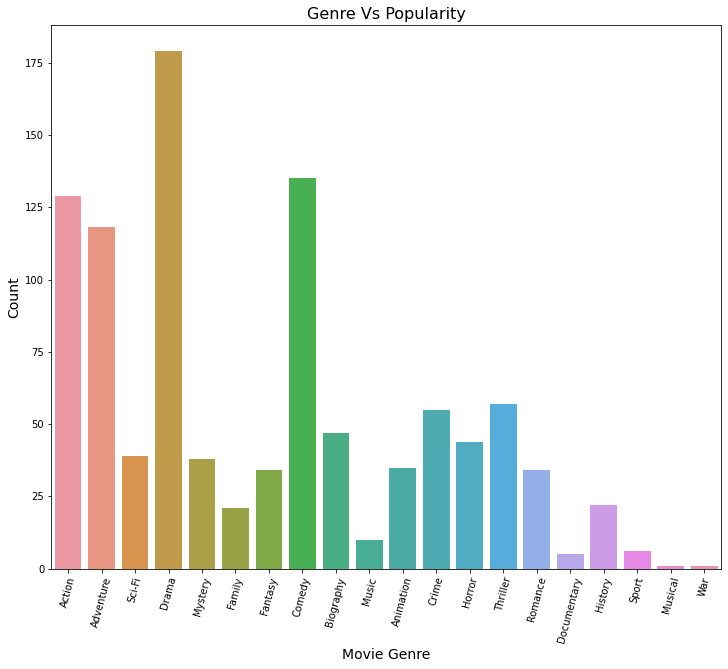

In [163]:
# plotting the data above


fig, ax = plt.subplots(figsize=(12,10))

x = genre
y = count

ax = sns.barplot(x = x, y = y, ax = ax)

ax.set_title('Genre Vs Population', fontsize=16)
ax.set_xlabel("Movie Genre",fontsize=14)
ax.set_ylabel("Count", fontsize=14);

ax.set_xticklabels(labels = x, rotation = 75)
fig.savefig('Genres Vs Population.png');

From the bar graph,we can say that Drama is the most popular Genre in the movie industry as it has the tallest bar.

In [164]:
# sorting to find the popular movies per vote_average

movie_ratings = final_df.sort_values(by = ['popularity', 'vote_average'],ascending=(False, False)).head(10)
movie_ratings = movie_ratings.sort_values('vote_average',ascending=False).reset_index(drop=True)

In [165]:
# The highly rated movies

movie_ratings.loc[:,['movie','vote_average','studio']]

,movie,vote_average,studio
0,Avengers: Infinity War,8.3,BV
1,Thor: Ragnarok,7.5,BV
2,Blade Runner 2049,7.4,WB
3,Spider-Man: Homecoming,7.4,Sony
4,Avengers: Age of Ultron,7.3,BV
5,Ant-Man and the Wasp,7.0,BV
6,Fantastic Beasts: The Crimes of Grindelwald,6.9,WB
7,Bumblebee,6.5,Par.
8,X-Men: Apocalypse,6.5,Fox
9,Mortal Engines,6.0,Uni.


In [166]:
final_df['studio'].unique()

array(['BV', 'WB', 'Sony', 'Uni.', 'Par.', 'STX', 'Fox', 'LGF', 'LG/S',
       'WB (NL)', 'EOne', 'Wein.', 'Focus', 'Annapurna', 'W/Dim.',
       'Studio 8', 'MGM', 'ORF', 'Strand', 'SGem', 'TriS', 'GrtIndia',
       'BST', 'RAtt.', 'VE', 'EC', 'BG', 'Amazon', 'FoxS', 'RTWC',
       'Global Road', 'A24', 'FCW', 'Neon', 'IFC', 'SPC', 'Rela.',
       'Affirm', 'BH Tilt', 'PFR'], dtype=object)

### 4.2 What are the most popular studios with high world-wide gross?

In [167]:
# sorting values to find movies with the highest grossing

highest_gross = final_df.sort_values('worldwide_gross', ascending = False).head(10)
highest_gross.reset_index(drop=True)

,movie,production_budget,worldwide_gross,international_gross,profit/loss,studio,foreign_gross,popularity,vote_average,vote_count,runtime_minutes,genres
0,Avengers: Infinity War,300000000.0,2.048134e+09,1.369319e+09,1748134200,BV,"1,369.5",80.773,8.3,13948,149.0,"Action,Adventure,Sci-Fi"
1,Jurassic World,215000000.0,1.648855e+09,9.965842e+08,1433854864,Uni.,"1,019.4",20.709,6.6,14056,124.0,"Action,Adventure,Sci-Fi"
2,Avengers: Age of Ultron,330600000.0,1.403014e+09,9.440081e+08,1072413963,BV,946400000,44.383,7.3,13457,141.0,"Action,Adventure,Sci-Fi"
3,Black Panther,200000000.0,1.348258e+09,6.481986e+08,1148258224,BV,646900000,2.058,5.1,11,134.0,"Action,Adventure,Sci-Fi"
4,Jurassic World: Fallen Kingdom,170000000.0,1.305773e+09,8.880531e+08,1135772799,Uni.,891800000,34.958,6.5,5995,128.0,"Action,Adventure,Sci-Fi"
5,Incredibles 2,200000000.0,1.242521e+09,6.339390e+08,1042520711,BV,634200000,36.286,7.6,6354,118.0,"Action,Adventure,Animation"
6,The Fate of the Furious,250000000.0,1.234846e+09,1.009081e+09,984846267,Uni.,"1,010.0",28.668,6.9,6335,136.0,"Action,Crime,Thriller"
7,Minions,74000000.0,1.160336e+09,8.242904e+08,1086336173,Uni.,823400000,9.338,6.4,7343,91.0,"Adventure,Animation,Comedy"
8,Aquaman,160000000.0,1.146895e+09,8.118328e+08,986894640,WB,812700000,38.102,6.8,6155,143.0,"Action,Adventure,Fantasy"
9,Captain America: Civil War,250000000.0,1.140069e+09,7.319851e+08,890069413,BV,745200000,39.137,7.4,14000,147.0,"Action,Adventure,Sci-Fi"


In [168]:
# movies with the highest gross

highest_gross.loc[:,['movie','worldwide_gross']]

,movie,worldwide_gross
1,Avengers: Infinity War,2.048134e+09
10,Jurassic World,1.648855e+09
0,Avengers: Age of Ultron,1.403014e+09
11,Black Panther,1.348258e+09
39,Jurassic World: Fallen Kingdom,1.305773e+09
12,Incredibles 2,1.242521e+09
7,The Fate of the Furious,1.234846e+09
117,Minions,1.160336e+09
45,Aquaman,1.146895e+09
5,Captain America: Civil War,1.140069e+09


In [169]:
import matplotlib.ticker as mticker

<ipython-input-171-23765b0daa1e>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels = y,fontsize=14)


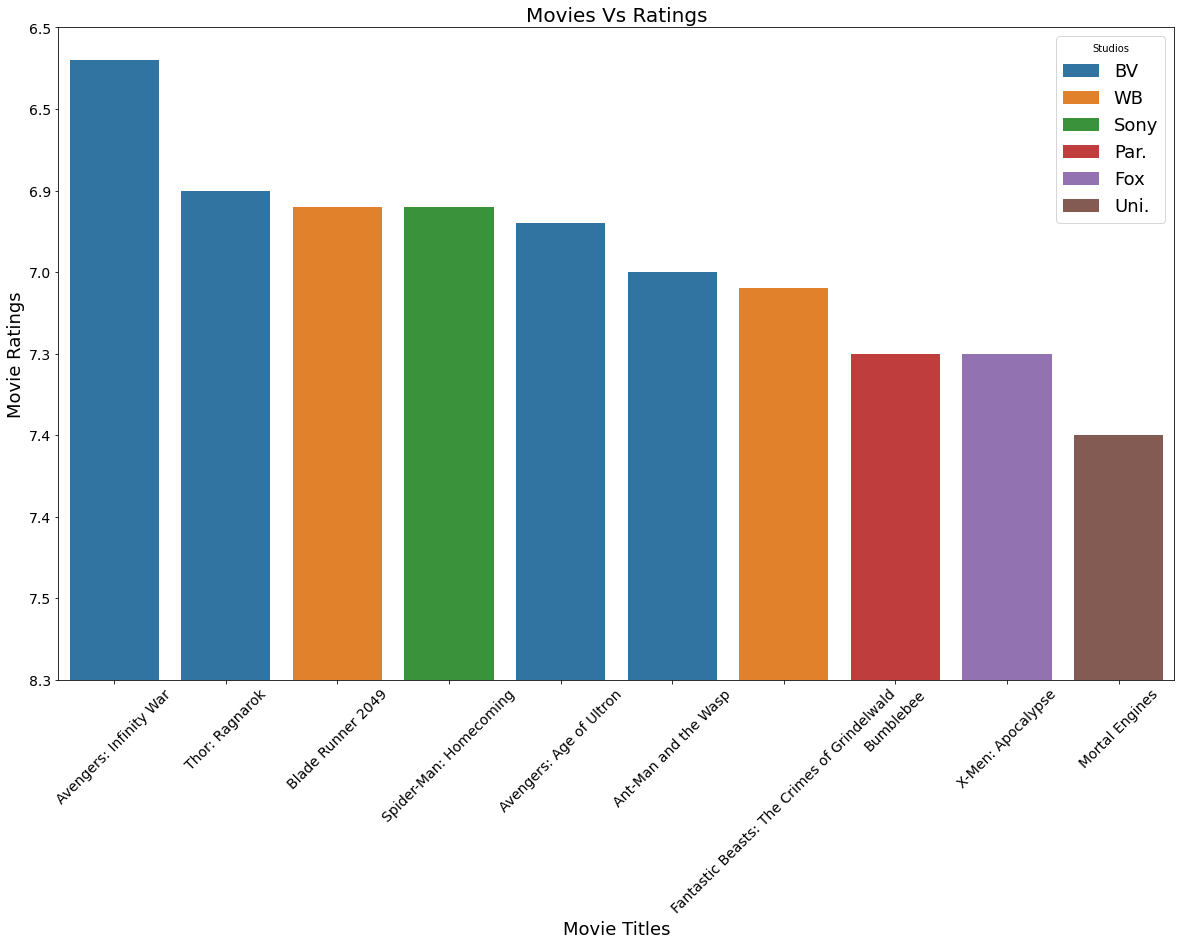

In [171]:
# plotting the data above

fig, ax1= plt.subplots(figsize=(20,12))

x = list(movie_ratings['movie'].values)
y = movie_ratings['vote_average']

ax1 = sns.barplot(data = movie_ratings, x = 'movie', y = 'vote_average', hue = 'studio', ax = ax1, dodge=False)

ax1.set_title('Movies Vs Ratings', fontsize=20)
ax1.set_xlabel("Movie Titles",fontsize=18)
ax1.set_ylabel("Movie Ratings", fontsize=18)
ax1.legend(title='Studios', fontsize=18, loc=1)
ax1.set_xticklabels(labels = x, rotation = 60,fontsize=14)
ax1.set_yticklabels(labels = y,fontsize=14)

ax1.set_xticklabels(labels = x, rotation = 45)
ax1.set_ylim(4.5, 8.5)
fig.savefig('Movies Vs Ratings per studio.png')

From the bar graph we can see that BV studios has highly rated movies, with the top two movies being Avengers and Thor.

<ipython-input-173-5fc8ff7005f0>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(labels = y,fontsize=14)


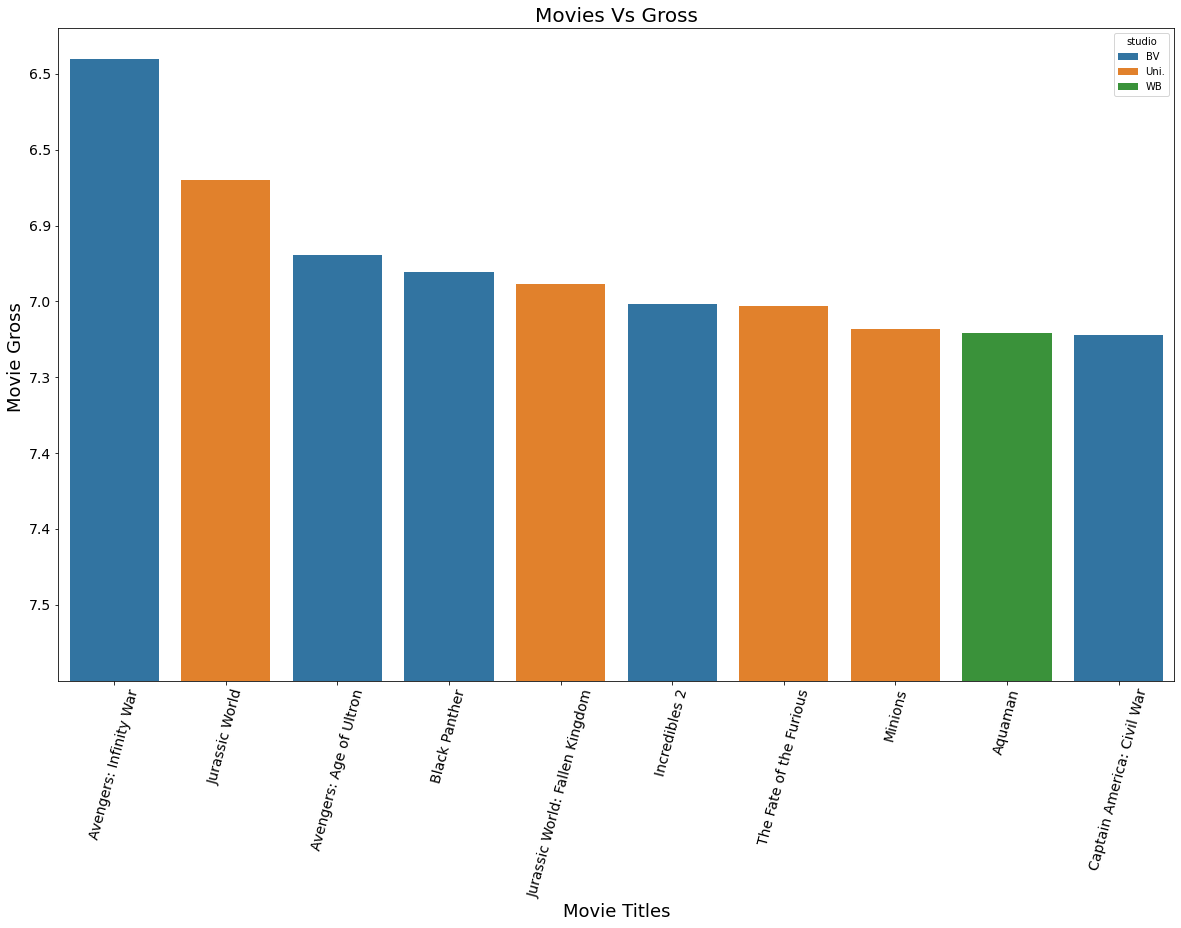

In [173]:
fig, ax2= plt.subplots(figsize=(20,12))
ax2 = sns.barplot(data = highest_gross, x = 'movie', y = 'worldwide_gross',hue = 'studio', ax = ax2, dodge=False)

labels = list(highest_gross['movie'])
ax2.set_title('Movies Vs Gross', fontsize=20)
ax2.set_xlabel("Movie Titles",fontsize=18)
ax2.set_ylabel("Movie Gross ", fontsize=18)
ax2.set_ylim(1000)

ax2.set_xticklabels(labels = labels, rotation = 75,fontsize=14)
ax2.set_yticklabels(labels = y,fontsize=14)

fig.savefig('Movies Vs Worldwide gross.png');

### 4.3 Does popularity affect the worldwide gross?

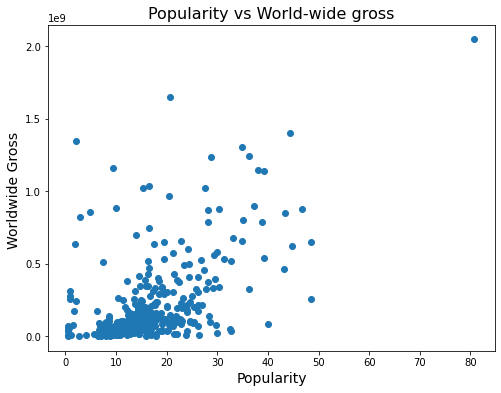

In [174]:
# plotting a scatterplot

fig, ax= plt.subplots(figsize=(8,6))

x = final_df['popularity']
y = final_df['worldwide_gross']

ax.scatter(x,y)

ax.set_title('Popularity vs World-wide gross', fontsize=16)
ax.set_xlabel("Popularity",fontsize=14)
ax.set_ylabel("Worldwide Gross ", fontsize=14)
fig.savefig('Popularity vs Worldwide gross.png');

### 4.4 Does budget affect revenue?

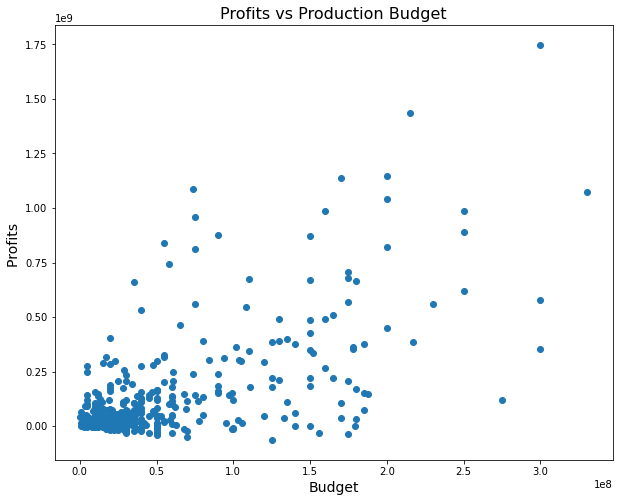

In [187]:
# plotting a scatterplot

fig, ax= plt.subplots(figsize=(10,8))

x = final_df['production_budget']
y = final_df['profit/loss']

ax.scatter(x,y)

ax.set_title('Profits vs Production Budget', fontsize=16)
ax.set_xlabel("Budget",fontsize=14)
ax.set_ylabel("Profits ", fontsize=14)
fig.savefig('Budget vs Revenue.png');

### 4.5 Does rating affect revenue?

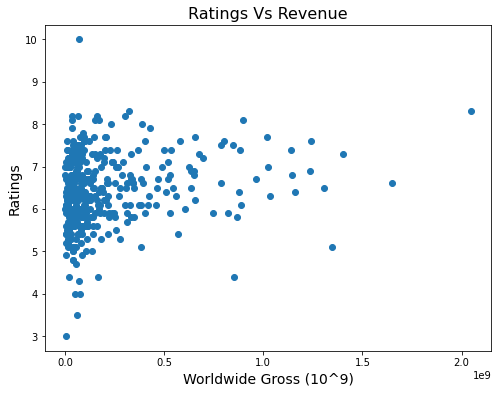

In [186]:
# plotting a scatterplot

fig, ax= plt.subplots(figsize=(8,6))

x = final_df['worldwide_gross']
y = final_df['vote_average']

ax.scatter(x,y)

ax.set_title('Ratings Vs Revenue', fontsize=16)
ax.set_ylabel("Ratings",fontsize=14)
ax.set_xlabel("Worldwide Gross (10^9)", fontsize=14)
fig.savefig('Ratings vs Revenue.png');

### 4.6 Does popularity affect the rating?

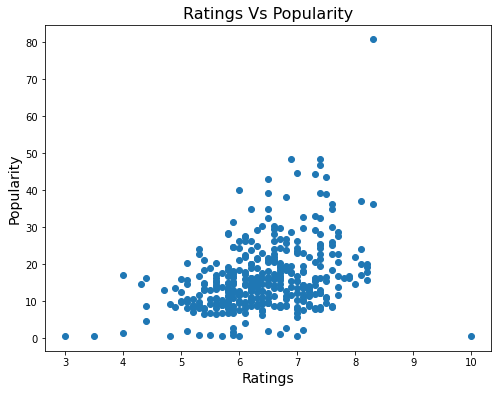

In [178]:
# plotting a scatterplot

fig, ax= plt.subplots(figsize=(8,6))

x = final_df['vote_average']
y = final_df['popularity']

ax.scatter(x,y)

ax.set_title('Ratings Vs Popularity', fontsize=16)
ax.set_xlabel("Ratings",fontsize=14)
ax.set_ylabel("Popularity", fontsize=14)
fig.savefig('Ratings vs Popularity.png');

### 4.7 Does the runtime minutes affect the ratings?

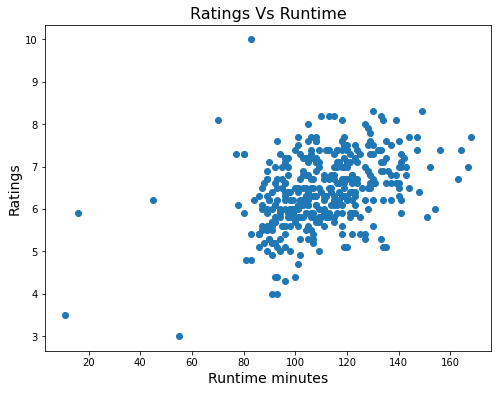

In [184]:
# plotting a scatterplot

fig, ax= plt.subplots(figsize=(8,6))

x = final_df['runtime_minutes']
y = final_df['vote_average']

ax.scatter(x,y)

ax.set_title('Ratings Vs Runtime', fontsize=16)
ax.set_ylabel("Ratings",fontsize=14)
ax.set_xlabel("Runtime minutes", fontsize=14)
fig.savefig('Ratings vs Runtime.png');

### 4.8 Does runtime minutes affect the popularity?

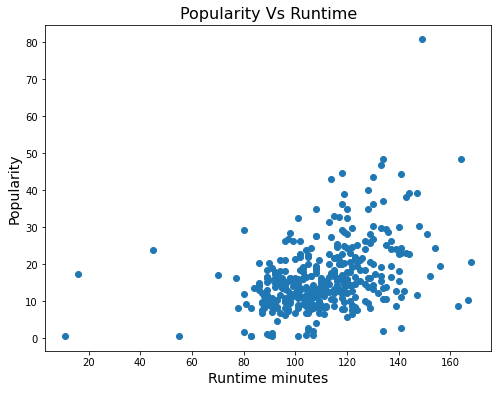

In [181]:
# plotting a scatterplot

fig, ax= plt.subplots(figsize=(8,6))

x= final_df['runtime_minutes'] 
y= final_df['popularity']


ax.scatter(x,y)

ax.set_title('Popularity Vs Runtime', fontsize=16)
ax.set_ylabel("Popularity",fontsize=14)
ax.set_xlabel("Runtime minutes", fontsize=14)
fig.savefig('Popularity vs Runtime.png');

CONCLUSION
In conclusion, I overwhelmingly support the assertion that drama is indeed the most dominated genre in world. As per the bar graph, Genre vs popularity drama came first with 179 points. The success of classic theatrical works and also the widespread consumption of dramatic films has greatly contributed to popularity of drama. Despite the rise of other genres such as comedy and several emerging forms of entertainment, the enduring appeal of drama remains undeniable.

The evidence presented regarding the relationship between the high ratings and the revenue collected clearly illustrates that there is little to no correlation between the ratings and revenue. In the coming days, it will be of importance to continue researching the complexities of movie success and audience preferences. Through that, the filmmakers can be better supported in creating meaningful, impactful works of art that resonate with audiences on a deeper level. The true success of cinema lies in the ability to captivate, inspire, and provoke thought, regardless of commercial metrics.


  